# **Ejercicio Perceptrón**

Partiendo del ejemplo anterior:
1. Cambia el número de observaciones a 100.000 y comprueba qué sucede
2. Cambia el número de observaciones a 1.000.000 y comprueba qué sucede
3. Juega con el ratio de aprendizaje con los siguientes valores: 0.0001, 0.001, 0.1, 1
4. Prueba cambiar la función de pérdida.  En el ejercicio, minimizamos el error cuadrático medio.  Esta vez minimiza el error absoluto, que es básicamente el sumatorio de los deltas en valor absoluto $$ \Sigma_i = |y_i-t_i| $$
5. Crea una nueva función de activación que sea f(x,z) = 13 * xs + 7 * zs -12 y comprueba si el algoritmo funciona de la misma manera.
        

## **1. Cambia el número de observaciones a 100.000 y comprueba qué sucede**


In [1]:
# Cargamos librerías

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

2025-01-07 10:31:46.466435: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


#### **Generamos los datos (100_000)**

In [6]:
observations = 100_000

np.random.seed(123)
xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1, 1, (observations,1))

targets = 2*xs - 3*zs + 5 + noise

# Hasta aquí hemos generado los mismos datos, ahora los guardamos
np.savez('data/data_100_000', inputs=inputs, targets=targets)

#### **Resloviendo con Tensorflow**

In [7]:
# Cargamos el conjunto de datos
training_data = np.load('data/data_100_000.npz')

In [8]:
# Declaramos una variable donde guardaremos el total de variables del modelo
# En nuestro caso 2 xs y zs
#input_size = 2

# Declaramos el total de variables de salida del modelo
# En nuestro caso 1
output_size = 1

# Definimos nuestro modelo como secuencial.
# En esta etapa no hay datos involucrados, sólo definimos lo que queremos hacer.
model = tf.keras.Sequential([
                            # Cada capa se lista aquí
                            # Definimos las características de la red
                            # Dense, nos permite definir la operación matemática a ejecutar xw + b
                            # Básicamente aplica la operación: output = activation(dot(input, kernel) + bias
                            tf.keras.layers.Dense(output_size,
                                                 kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
                                                 bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)
                                                 )
                            ])

# Definimos el ratio de aprendizaje
custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

# Definimos la función de pérdida a minimizar.  En este caso el error cuadrático medio
model.compile(optimizer=custom_optimizer, loss='mean_squared_error')

# Definimos el modelo con los datos de entrada y targets.
# Ejecutamos 100 ciclos
model.fit(training_data['inputs'], training_data['targets'], epochs=300, verbose=1)

Epoch 1/300
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2s 610us/step - loss: 2.6568
Epoch 2/300
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2s 692us/step - loss: 0.3414
Epoch 3/300
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2s 759us/step - loss: 0.3440
Epoch 4/300
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2s 558us/step - loss: 0.3433
Epoch 5/300
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2s 559us/step - loss: 0.3423
Epoch 6/300
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2s 642us/step - loss: 0.3440
Epoch 7/300
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 3s 798us/step - loss: 0.3441
Epoch 8/300
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2s 568us/step - loss: 0.3432
Epoch 9/300
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2s 660us/step - loss: 0.3411
Epoch 10/300
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2s 695us/step - loss: 0.3435
Epoch 11/300
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 3s 950us/step - loss: 0.3462
Epoch 12/300
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2s 751us/step - loss: 0.3435
Epoch 13/300
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2s 760us/step - loss: 0.3438
Epoch 14/300
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2s 658us/step - 

#### **Extraemos los pesos y bias**

La extracción de pesos y bias del modelo no es necesaria en el proceso de machine learning.  De hecho, no se ejecuta habitualmente, pero en este ejemplo simple nos sirve para comprobar que los resultados son correctos.

In [10]:
# La extracción de pesos y biases es muy sencilla
model.layers[0].get_weights()

[array([[ 2.0133858],
        [-2.9824955]], dtype=float32),
 array([5.0117683], dtype=float32)]

In [11]:
weights = model.layers[0].get_weights()[0]
bias = model.layers[0].get_weights()[1]
print(weights)
print(bias)

# éste es un modelo simple, pero en otros más complicados podemos tener cientos o miles de valores en estas variables

[[ 2.0133858]
 [-2.9824955]]
[5.0117683]


#### **Generar las predicciones**

In [12]:
# Datos predichos
model.predict_on_batch(training_data['inputs']).round(1)

array([[30.3],
       [ 8.7],
       [20.5],
       ...,
       [42.9],
       [10.9],
       [26.9]], dtype=float32)

In [13]:
# Datos reales
training_data['targets'].round(1)

array([[29.5],
       [ 8.3],
       [21.7],
       ...,
       [42.8],
       [10.7],
       [26.6]])

#### **Pintamos los datos**

In [14]:
np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets'])

(array([30.261667,  8.703772, 20.51409 , ..., 42.868195, 10.881088,
        26.900196], dtype=float32),
 array([29.46246055,  8.26681469, 21.69836826, ..., 42.77347206,
        10.72972402, 26.6244577 ]))

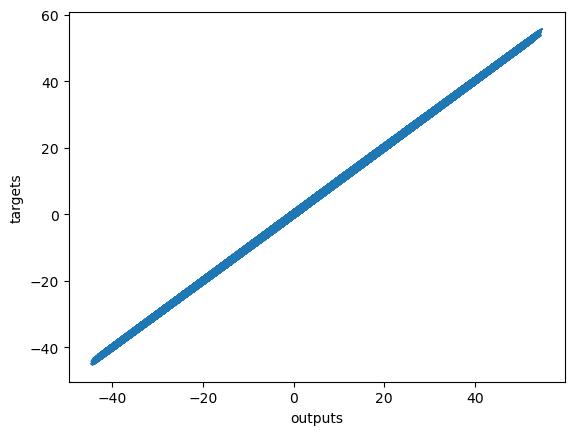

In [15]:
# Usamos np.squeeze para poder ajustar los datos a lo que espera plt.plot
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()

# La idea de haber usado TensorFlow para el mismo ejercicio y poder comparar las líneas de código necesarias
# para obtener el mismo resultado.  Muchas menos en TensorFlow


---

## **2. Cambia el número de observaciones a 1.000.000 y comprueba qué sucede**


#### **Generamos los datos (1_000_000)**

In [16]:
observations = 1_000_000

np.random.seed(123)
xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1, 1, (observations,1))

targets = 2*xs - 3*zs + 5 + noise

# Hasta aquí hemos generado los mismos datos, ahora los guardamos
np.savez('data/data_1_000_000', inputs=inputs, targets=targets)

#### **Resloviendo con Tensorflow**

In [17]:
# Cargamos el conjunto de datos
training_data = np.load('data/data_1_000_000.npz')

In [18]:
# Declaramos una variable donde guardaremos el total de variables del modelo
# En nuestro caso 2 xs y zs
#input_size = 2

# Declaramos el total de variables de salida del modelo
# En nuestro caso 1
output_size = 1

# Definimos nuestro modelo como secuencial.
# En esta etapa no hay datos involucrados, sólo definimos lo que queremos hacer.
model = tf.keras.Sequential([
                            # Cada capa se lista aquí
                            # Definimos las características de la red
                            # Dense, nos permite definir la operación matemática a ejecutar xw + b
                            # Básicamente aplica la operación: output = activation(dot(input, kernel) + bias
                            tf.keras.layers.Dense(output_size,
                                                 kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
                                                 bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)
                                                 )
                            ])

# Definimos el ratio de aprendizaje
custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

# Definimos la función de pérdida a minimizar.  En este caso el error cuadrático medio
model.compile(optimizer=custom_optimizer, loss='mean_squared_error')

# Definimos el modelo con los datos de entrada y targets.
# Ejecutamos 100 ciclos
model.fit(training_data['inputs'], training_data['targets'], epochs=300, verbose=1)

Epoch 1/300
31250/31250 ━━━━━━━━━━━━━━━━━━━━ 24s 750us/step - loss: 0.6661
Epoch 2/300
31250/31250 ━━━━━━━━━━━━━━━━━━━━ 22s 688us/step - loss: 0.3441
Epoch 3/300
31250/31250 ━━━━━━━━━━━━━━━━━━━━ 22s 697us/step - loss: 0.3444
Epoch 4/300
31250/31250 ━━━━━━━━━━━━━━━━━━━━ 19s 594us/step - loss: 0.3440
Epoch 5/300
31250/31250 ━━━━━━━━━━━━━━━━━━━━ 20s 632us/step - loss: 0.3434
Epoch 6/300
31250/31250 ━━━━━━━━━━━━━━━━━━━━ 31s 983us/step - loss: 0.3438
Epoch 7/300
31250/31250 ━━━━━━━━━━━━━━━━━━━━ 24s 768us/step - loss: 0.3436
Epoch 8/300
31250/31250 ━━━━━━━━━━━━━━━━━━━━ 26s 841us/step - loss: 0.3438
Epoch 9/300
31250/31250 ━━━━━━━━━━━━━━━━━━━━ 19s 610us/step - loss: 0.3442
Epoch 10/300
31250/31250 ━━━━━━━━━━━━━━━━━━━━ 18s 587us/step - loss: 0.3435
Epoch 11/300
31250/31250 ━━━━━━━━━━━━━━━━━━━━ 23s 734us/step - loss: 0.3436
Epoch 12/300
31250/31250 ━━━━━━━━━━━━━━━━━━━━ 25s 799us/step - loss: 0.3434
Epoch 13/300
31250/31250 ━━━━━━━━━━━━━━━━━━━━ 18s 582us/step - loss: 0.3437
Epoch 14/300
31250/31

#### **Extraemos los pesos y bias**

La extracción de pesos y bias del modelo no es necesaria en el proceso de machine learning.  De hecho, no se ejecuta habitualmente, pero en este ejemplo simple nos sirve para comprobar que los resultados son correctos.

In [21]:
# La extracción de pesos y biases es muy sencilla
model.layers[0].get_weights()

[array([[ 1.9966922],
        [-2.9936044]], dtype=float32),
 array([5.006704], dtype=float32)]

In [22]:
weights = model.layers[0].get_weights()[0]
bias = model.layers[0].get_weights()[1]
print(weights)
print(bias)

# éste es un modelo simple, pero en otros más complicados podemos tener cientos o miles de valores en estas variables

[[ 1.9966922]
 [-2.9936044]]
[5.006704]


#### **Generar las predicciones**

In [19]:
# Datos predichos
model.predict_on_batch(training_data['inputs']).round(1)

array([[ -3.5],
       [ -1.6],
       [ 22.8],
       ...,
       [ -8.1],
       [-11.1],
       [-22.8]], dtype=float32)

In [ ]:
# Datos reales
training_data['targets'].round(1)

#### **Pintamos los datos**

In [ ]:
np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets'])

In [ ]:
# Usamos np.squeeze para poder ajustar los datos a lo que espera plt.plot
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()

# La idea de haber usado TensorFlow para el mismo ejercicio y poder comparar las líneas de código necesarias
# para obtener el mismo resultado.  Muchas menos en TensorFlow


---

## **3. Juega con el ratio de aprendizaje con los siguientes valores: 0.0001, 0.001, 0.1, 1**

#### **Generamos los datos (10_000)**

In [ ]:
observations = 10_000

np.random.seed(123)
xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1, 1, (observations,1))

targets = 2*xs - 3*zs + 5 + noise

# Hasta aquí hemos generado los mismos datos, ahora los guardamos
np.savez('data/data_10_000', inputs=inputs, targets=targets)

#### **Resloviendo con Tensorflow**

In [ ]:
# Cargamos el conjunto de datos
training_data = np.load('data/data_10_000.npz')

In [ ]:
# # Declaramos una variable donde guardaremos el total de variables del modelo
# # En nuestro caso 2 xs y zs
# #input_size = 2

# # Declaramos el total de variables de salida del modelo
# # En nuestro caso 1
# output_size = 1

# # Definimos nuestro modelo como secuencial.
# # En esta etapa no hay datos involucrados, sólo definimos lo que queremos hacer.
# model = tf.keras.Sequential([
#                             # Cada capa se lista aquí
#                             # Definimos las características de la red
#                             # Dense, nos permite definir la operación matemática a ejecutar xw + b
#                             # Básicamente aplica la operación: output = activation(dot(input, kernel) + bias
#                             tf.keras.layers.Dense(output_size,
#                                                  kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
#                                                  bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)
#                                                  )
#                             ])

# # Definimos el ratio de aprendizaje
# custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

# # Definimos la función de pérdida a minimizar.  En este caso el error cuadrático medio
# model.compile(optimizer=custom_optimizer, loss='mean_squared_error')

# # Definimos el modelo con los datos de entrada y targets.
# # Ejecutamos 100 ciclos
# model.fit(training_data['inputs'], training_data['targets'], epochs=300, verbose=1)

In [ ]:
def train_model(training_data, learning_rate):
    # Definimos el tamaño de salida del modelo
    output_size = 1

    # Definimos el modelo
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(output_size,
                              kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
                              bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1))
    ])

    # Configuramos el optimizador con el learning rate específico
    custom_optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)

    # Compilamos el modelo con la función de pérdida
    model.compile(optimizer=custom_optimizer, loss='mean_squared_error')

    # Entrenamos el modelo
    history = model.fit(training_data['inputs'], training_data['targets'], 
                        epochs=300, verbose=0)  # Cambiar verbose a 1 para más detalles

    # Obtenemos el error final (última pérdida)
    final_loss = history.history['loss'][-1]
    return final_loss


In [ ]:
# Lista de valores de learning rate
learning_rates = [0.0001, 0.001, 0.1, 1]

# Cargamos los datos
training_data = np.load('data/data_10_000.npz')

# Diccionario para guardar los resultados
results = {}

# Iteramos sobre los learning rates
for lr in learning_rates:
    print(f"Entrenando con learning_rate = {lr}")
    final_loss = train_model(training_data, learning_rate=lr)
    results[lr] = final_loss
    print(f"Final loss: {final_loss}")


In [ ]:
# Visualizamos los resultados
plt.figure(figsize=(8, 5))
plt.plot(results.keys(), results.values(), marker='o')
plt.xscale('log')  # Escala logarítmica para visualizar mejor los cambios
plt.xlabel('Learning Rate')
plt.ylabel('Final Loss')
plt.title('Efecto del Learning Rate en la Pérdida Final')
plt.grid()
plt.show()


---

## **4. Prueba cambiar la función de pérdida.  En el ejercicio, minimizamos el error cuadrático medio.  Esta vez minimiza el error absoluto, que es básicamente el sumatorio de los deltas en valor absoluto $$ \Sigma_i = |y_i-t_i| $$**

In [ ]:
# Cargamos librerías
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
# Cargamos el conjunto de datos
training_data = np.load('data/data_10_000.npz')

In [ ]:
# Declaramos el total de variables de salida del modelo
# En nuestro caso 1
output_size = 1

# Definimos nuestro modelo como secuencial.
# En esta etapa no hay datos involucrados, sólo definimos lo que queremos hacer.
model = tf.keras.Sequential([
                            # Cada capa se lista aquí
                            # Definimos las características de la red
                            # Dense, nos permite definir la operación matemática a ejecutar xw + b
                            # Básicamente aplica la operación: output = activation(dot(input, kernel) + bias
                            tf.keras.layers.Dense(output_size,
                                                 kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
                                                 bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)
                                                 )
                            ])

# Definimos el ratio de aprendizaje
custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

# Definimos la función de pérdida a minimizar.  En este caso el error cuadrático medio
model.compile(optimizer=custom_optimizer, loss='mean_absolute_error')

# Definimos el modelo con los datos de entrada y targets.
# Ejecutamos 100 ciclos
model.fit(training_data['inputs'], training_data['targets'], epochs=300, verbose=1)

---

Versión custom con funciones 

In [ ]:
# Cargamos librerías
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Cargamos el conjunto de datos
training_data = np.load('data/data_100_000.npz')

# Definimos la función para entrenar el modelo con MAE
def train_model_with_mae(training_data, learning_rate):
    # Definimos el tamaño de salida del modelo
    output_size = 1

    # Definimos el modelo
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(output_size,
                              kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
                              bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1))
    ])

    # Configuramos el optimizador con el learning rate específico
    custom_optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)

    # Compilamos el modelo con la función de pérdida MAE
    model.compile(optimizer=custom_optimizer, loss='mean_absolute_error')

    # Entrenamos el modelo
    history = model.fit(training_data['inputs'], training_data['targets'], 
                        epochs=300, verbose=1)  # Cambiar verbose a 0 si no quieres ver los detalles

    # Obtenemos el error final (última pérdida)
    final_loss = history.history['loss'][-1]
    return final_loss

# Ejecutamos el entrenamiento con el learning rate 0.01
learning_rate = 0.01
final_loss = train_model_with_mae(training_data, learning_rate=learning_rate)

# Mostramos el resultado
print(f"Pérdida final utilizando MAE con learning rate {learning_rate}: {final_loss}")


In [20]:
# 3. Explicación paso a paso
# Cargar datos: El conjunto de datos generado previamente se utiliza directamente.
# Modelo: No cambia respecto al ejercicio anterior. Es un modelo secuencial simple con una única capa densa.
# Función de pérdida: Se reemplaza mean_squared_error por mean_absolute_error en la función model.compile.
# Entrenamiento: Ejecutamos el modelo durante 300 épocas con un learning_rate fijo de 0.01.
# Resultado: Al final del entrenamiento, imprimimos la pérdida final (MAE).

In [ ]:
# Comparación con MSE

# Función para entrenar con diferentes funciones de pérdida
def train_model_with_loss(training_data, learning_rate, loss_function):
    output_size = 1
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(output_size,
                              kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
                              bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1))
    ])
    custom_optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(optimizer=custom_optimizer, loss=loss_function)
    history = model.fit(training_data['inputs'], training_data['targets'], epochs=300, verbose=0)
    return history.history['loss'][-1]

# Comparación de MSE y MAE
loss_functions = ['mean_squared_error', 'mean_absolute_error']
results = {}

for loss_function in loss_functions:
    print(f"Entrenando con función de pérdida: {loss_function}")
    final_loss = train_model_with_loss(training_data, learning_rate=0.01, loss_function=loss_function)
    results[loss_function] = final_loss
    print(f"Pérdida final: {final_loss}")

# Mostrar los resultados
print("\nResultados:")
for loss_function, loss in results.items():
    print(f"{loss_function}: {loss}")


In [ ]:
# Visualización de la pérdida

# Visualización de la pérdida durante las épocas
history_mse = train_model_with_loss(training_data, learning_rate=0.01, loss_function='mean_squared_error')
history_mae = train_model_with_loss(training_data, learning_rate=0.01, loss_function='mean_absolute_error')

plt.figure(figsize=(8, 5))
plt.plot(history_mse, label='MSE')
plt.plot(history_mae, label='MAE')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.title('Comparación de MSE y MAE durante el entrenamiento')
plt.legend()
plt.grid()
plt.show()


---

## **5. Crea una nueva función de activación que sea f(x,z) = 13 * xs + 7 * zs -12 y comprueba si el algoritmo funciona de la misma manera.**

#### **Generamos los datos (1_000)**

In [ ]:
observations = 1_000

np.random.seed(123)
xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1, 1, (observations,1))

targets = 13*xs - 7*zs + -12 + noise

# Hasta aquí hemos generado los mismos datos, ahora los guardamos
np.savez('data/data_1_000', inputs=inputs, targets=targets)

In [ ]:
# Cargamos el conjunto de datos
training_data = np.load('data/data_1_000.npz')

In [ ]:
# Declaramos una variable donde guardaremos el total de variables del modelo
# En nuestro caso 2 xs y zs
#input_size = 2

# Declaramos el total de variables de salida del modelo
# En nuestro caso 1
output_size = 1

# Definimos nuestro modelo como secuencial.
# En esta etapa no hay datos involucrados, sólo definimos lo que queremos hacer.
model = tf.keras.Sequential([
                            # Cada capa se lista aquí
                            # Definimos las características de la red
                            # Dense, nos permite definir la operación matemática a ejecutar xw + b
                            # Básicamente aplica la operación: output = activation(dot(input, kernel) + bias
                            tf.keras.layers.Dense(output_size,
                                                 kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
                                                 bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)
                                                 )
                            ])

# Definimos el ratio de aprendizaje
custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

# Definimos la función de pérdida a minimizar.  En este caso el error cuadrático medio
model.compile(optimizer=custom_optimizer, loss='mean_squared_error')

# Definimos el modelo con los datos de entrada y targets.
# Ejecutamos 100 ciclos
model.fit(training_data['inputs'], training_data['targets'], epochs=300, verbose=1)

In [ ]:
# La extracción de pesos y biases es muy sencilla
model.layers[0].get_weights()

In [ ]:
weights = model.layers[0].get_weights()[0]
bias = model.layers[0].get_weights()[1]
print(weights)
print(bias)

# éste es un modelo simple, pero en otros más complicados podemos tener cientos o miles de valores en estas variables

In [ ]:
# Datos predichos
model.predict_on_batch(training_data['inputs']).round(1)

In [ ]:
# Datos reales
training_data['targets'].round(1)

In [ ]:
np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets'])

In [ ]:
# Usamos np.squeeze para poder ajustar los datos a lo que espera plt.plot
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()

# La idea de haber usado TensorFlow para el mismo ejercicio y poder comparar las líneas de código necesarias
# para obtener el mismo resultado.  Muchas menos en TensorFlow
